In [1]:
%matplotlib notebook
import os
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
x = np.array([])
y = np.array([])
z = np.array([])
with open('2baw.pdb', 'r') as inF:
    for line in inF:
        if 'HETATM' in line and 'HOH' not in line and 'THE' not in line:
            ligand = line.rsplit()[3]
            ligandnumber = line.rsplit()[5]
            print(ligand)
            break
            
    for line in inF:
        if 'HETATM' in line and ligand in line and '920' in line:
            k= line.rsplit()
            print (k)
            x = np.append(x,float(k[6]))
            y = np.append(y,float(k[7]))
            z = np.append(z,float(k[8]))

   
           



B7G
['HETATM', '3989', 'O5', 'B7G', 'A', '920', '-8.386', '-18.169', '20.570', '1.00', '37.92', 'O']
['HETATM', '3990', 'C1', 'B7G', 'A', '920', '-9.012', '-16.892', '20.486', '1.00', '37.84', 'C']
['HETATM', '3991', 'C2', 'B7G', 'A', '920', '-10.479', '-17.031', '20.046', '1.00', '39.44', 'C']
['HETATM', '3992', 'C3', 'B7G', 'A', '920', '-11.239', '-18.064', '20.893', '1.00', '39.65', 'C']
['HETATM', '3993', 'C4', 'B7G', 'A', '920', '-10.457', '-19.375', '20.988', '1.00', '39.37', 'C']
['HETATM', '3994', 'C6', 'B7G', 'A', '920', '-8.225', '-20.445', '21.287', '1.00', '38.77', 'C']
['HETATM', '3995', 'O1', 'B7G', 'A', '920', '-8.245', '-16.183', '19.517', '1.00', '35.42', 'O']
['HETATM', '3996', 'C7', 'B7G', 'A', '920', '-7.812', '-14.907', '19.961', '1.00', '35.36', 'C']
['HETATM', '3997', 'C8', 'B7G', 'A', '920', '-6.338', '-14.934', '20.328', '1.00', '35.53', 'C']
['HETATM', '3998', 'C9', 'B7G', 'A', '920', '-5.494', '-14.153', '19.327', '1.00', '34.72', 'C']
['HETATM', '3999', 'C10

In [2]:
y

array([-18.169, -16.892, -17.031, -18.064, -19.375, -20.445, -16.183,
       -14.907, -14.934, -14.153, -13.384, -13.576, -14.463, -15.763,
       -18.343, -20.249, -20.226, -14.972])

In [3]:
sz = np.random.randint(5,1000,size=18)
sz

array([822, 297, 968, 286, 210,  65, 661, 346, 984, 890, 215, 140, 385,
       109, 239, 161, 184, 295])

In [4]:
with open('2baw.pdb','r') as file:
    for line in file:
            if 'ASP' in line and '475' in line:
                print (line)

SITE     3 AC1  9 ASP B 475                                                     

ATOM   1995  N   ASP A 475     -16.736 -27.520  25.355  1.00 48.00           N  

ATOM   1996  CA  ASP A 475     -17.216 -27.963  24.040  1.00 48.78           C  

ATOM   1997  C   ASP A 475     -16.159 -28.789  23.311  1.00 49.01           C  

ATOM   1998  O   ASP A 475     -16.167 -30.022  23.362  1.00 49.37           O  

ATOM   1999  CB  ASP A 475     -17.602 -26.760  23.174  1.00 49.07           C  

ATOM   2000  CG  ASP A 475     -16.612 -25.621  23.292  1.00 49.85           C  

ATOM   2001  OD1 ASP A 475     -17.008 -24.538  23.769  1.00 50.57           O  

ATOM   2002  OD2 ASP A 475     -15.428 -25.818  22.937  1.00 51.60           O  

TER    2003      ASP A 475                                                      

ATOM   3958  N   ASP B 475     -15.323 -11.514  19.125  1.00 47.48           N  

ATOM   3959  CA  ASP B 475     -16.115 -11.503  20.353  1.00 48.19           C  

ATOM   3960  C  

In [5]:
len(x)
dista=np.array([])
distb=np.array([])
lig_id=np.array([])
i=0
import xml.etree.ElementTree as ET
tree = ET.parse('report.xml')
root = tree.getroot()
levels = root.findall('.//hydrogen_bond')
for level in levels:
    val=level.find('restype_lig').text
    
    if val == ligand:
        dista = np.append(dista,float(level.find('dist_h-a').text))
        distb = np.append(distb,float(level.find('dist_d-a').text))
        tval=level.find('protisdon').text
        if tval == 'True':
            lig_id = np.append(lig_id,level.find('acceptoridx').text)
        else:
            lig_id = np.append(lig_id,level.find('donoridx').text)
        
        

In [6]:
print(dista)
print(lig_id)

[2.36 3.23 2.53 2.72 3.17 2.68 2.41 1.74 2.52]
['4005' '4002' '4002' '4003' '4002' '4024' '4024' '4021' '4022']


In [7]:
strength  = np.array([])
szs = np.array([])
for i in range(len(dista)):
    strength = np.append(strength,1/(float(dista[i])+float(distb[i])))
OldMin = np.min(strength)
OldMax = np.max(strength)
NewMin = 100 
NewMax = 1000
OldRange = (OldMax - OldMin)  
NewRange = (NewMax - NewMin)  

for s in strength:
    NewValue = (((s - OldMin) * NewRange) / OldRange) + NewMin
    szs = np.append(szs,int(NewValue))
    

In [8]:
j = np.random.randint(2,size=18)
colour = np.array([])
for i in range(len(j)):
    if j[i]==0:
        colour = np.append(colour,'b')
    else :
        colour = np.append(colour,'r')
z

array([20.57 , 20.486, 20.046, 20.893, 20.988, 21.287, 19.517, 19.961,
       20.328, 19.327, 20.063, 19.417, 20.256, 20.125, 20.331, 21.928,
       21.655, 19.399])

<IPython.core.display.Javascript object>


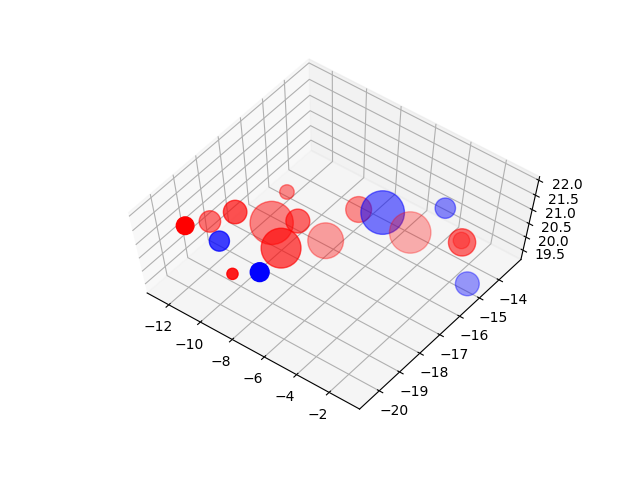

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c=colour,marker='o',s=sz)
plt.show()